--------------------
# <center>- MDI-720 - TP2 -</center>
--------------------
*Thomas KOCH*
[LIEN A SUPPRIMER](https://github.com/MSBigData2019/Karine_Petrus/blob/master/Statistique/TP3.ipynb)




Nous travaillons sur la base de données `diabetes` de python. La base initiale comporte
$n = 442$ patients et $p = 10$ covariables. La variable $Y$ à expliquer est un score correspondant à
l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en
y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti
notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien
entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous
ne connaissons pas les variables pertinentes. La nouvelle base de données comporte $n = 442$
patients et $p = 210$ covariables, notés $X$. Saurez-vous déjouer les plans de ce robot farceur et
retrouver les variables pertinentes ?



In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
from os import mkdir, path
from functools import partial  # functions that act on or return other function
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, Lasso, \
    lasso_path
from sklearn.linear_model import enet_path
from matplotlib.patches import Polygon, Circle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn import cross_validation
from sklearn.model_selection import KFold, train_test_split
from random import randint
import warnings

%matplotlib notebook

np.random.seed(seed=10)

warnings.filterwarnings('ignore')

-----------------
### Question 1 : 
>Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [2]:
# Import des données
dfDiab = pd.read_csv('data_dm3.csv',header=None)
dfDiab.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [3]:
type(dfDiab)

pandas.core.frame.DataFrame

In [4]:
dfDiab.shape

(442, 211)

In [5]:
# Observation et variable à expliquer
y_to_explicit = dfDiab.iloc[:,-1]

print('Le nombre de variables explicatives est de {} .'.format(len(dfDiab.iloc[1,:])-1))
print('Le nombre d\'observations est de {} .'.format(len(y_to_explicit)))

Le nombre de variables explicatives est de 210 .
Le nombre d'observations est de 442 .


-----------------
### Question 2 : 
>Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à
expliquer ? Tracer un scatter plot de la base de données avec 4 covariables prises au hasard
et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en
fonction de chacune des autres). Commenter les graphiques obtenus.

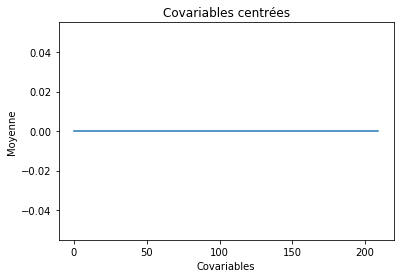

In [6]:
plt.figure()
plt.plot(round(np.mean(dfDiab.iloc[:,0:-1])))
plt.xlabel("Covariables")
plt.ylabel("Moyenne")
plt.title("Covariables centrées")
plt.show()

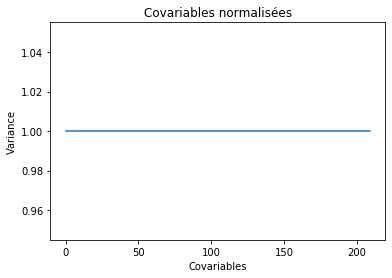

In [7]:
plt.figure()
plt.plot(round(np.var(dfDiab.iloc[:,0:-1])))
plt.xlabel("Covariables")
plt.ylabel("Variance")
plt.title("Covariables normalisées")
plt.show();

On constate donc que les covariables sont centrées et normalisées puisque leurs espérance sont égales à 0, et que leurs variances vaut 1.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

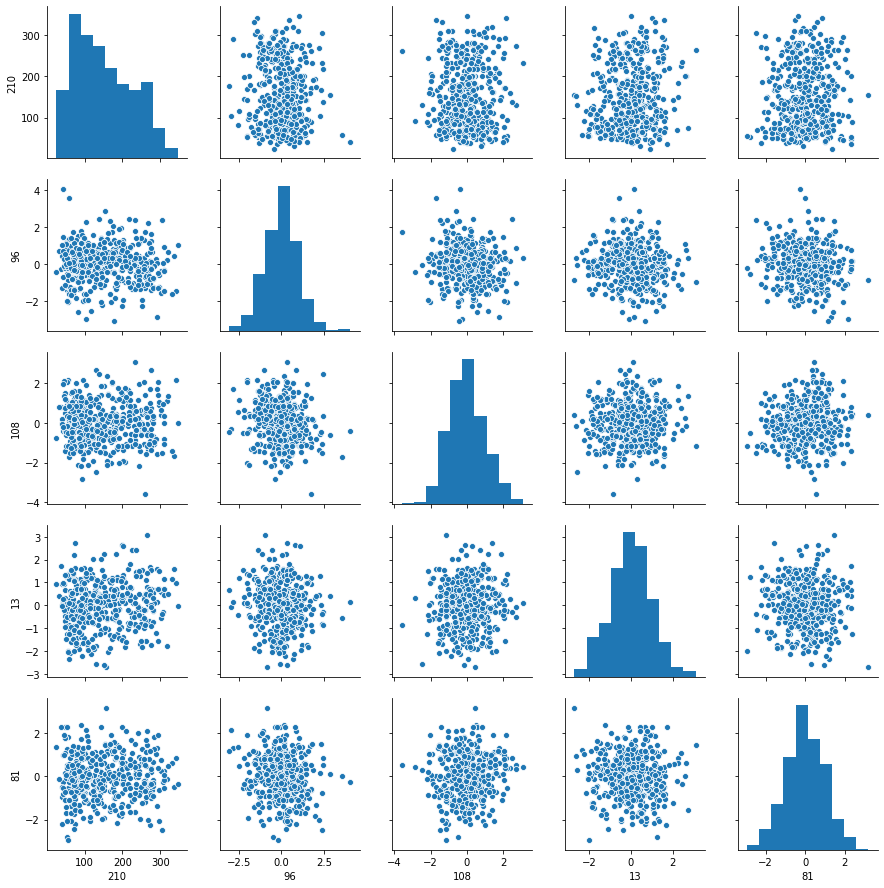

In [8]:
num_rand=[]
plt.clf()
plt.figure()

for i in range(4):
    num_rand.append(randint(0,len(dfDiab.iloc[1,:])-1))    

dfDiab1=dfDiab.iloc[:,0:-1]
X_explanatory=dfDiab1.iloc[:,num_rand]
#pd.plotting.scatter_matrix(X_explanatory)

Y_X = pd.concat([y_to_explicit,X_explanatory], axis=1)
sns.pairplot(Y_X)
plt.show();

In [9]:
for i in range(0,4):    
    print("La covariable {} a une espérance de {:.4f} et une variance de {:.4f}".format(X_explanatory.columns[i],np.mean(X_explanatory.iloc[:,i]),np.var(X_explanatory.iloc[:,i])))

print("La variable à expliquer a pour espérance {:.2f} et pour variance {:.2f}".format(np.mean(y_to_explicit),np.var(y_to_explicit)))

La covariable 96 a une espérance de 0.0000 et une variance de 1.0000
La covariable 108 a une espérance de -0.0000 et une variance de 1.0000
La covariable 13 a une espérance de -0.0000 et une variance de 1.0000
La covariable 81 a une espérance de 0.0000 et une variance de 1.0000
La variable à expliquer a pour espérance 152.13 et pour variance 5929.88


On retrouve donc que les covariables sont centrées et normalisées puisque leurs espérance sont égales à 0, et que leurs variances vaut 1.

En revanche, la variable à expliquer n'est ni centrée, ni normalisée.

------------
### Question 3 :
>Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle
$X_{train}$, un pour tester le modèle $X_{test}$. On mettra 20\% de la base dans l’échantillon "test". Donner les tailles de chacun des 2 échantillons. On notera que le nouvel échantillon de
covariables $X_{train}$ n’est pas normalisé. Dans la suite, on fera donc bien attention à inclure
l’intercept dans nos régression.

In [10]:
X_explanatory=dfDiab.iloc[:,0:-1] #on prend cette fois toutes les covariables dans X

X_train, X_test, y_train, y_test = train_test_split(X_explanatory,y_to_explicit, test_size = 0.2)
print("La taille de l'échantillon d'entrainement est de {:.0f} patients.".format(len(X_train)))
print("La taille de l'échantillon de test est de {:.0f} patients.".format(len(X_test)))

La taille de l'échantillon d'entrainement est de 353 patients.
La taille de l'échantillon de test est de 89 patients.


------------
### Question 4 :

>Donner la matrice de covariance calculée sur $X_{train}$. Tracer le graphe de la décroissance des
valeurs propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est
légitime de ne garder que les premières variables de l’ACP. On gardera 60 variables dans
la suite.

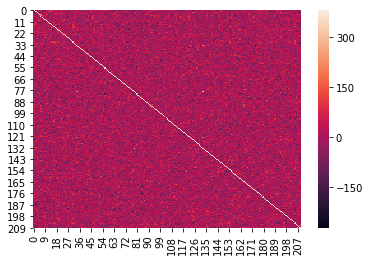

In [11]:
# Matrice de covariance

# On recentre nos données
X_train_centr = X_train - np.mean(X_train)
y_train_centr = y_train - np.mean(y_train)

X_test_centr = X_test - np.mean(X_test)
y_test_centr = y_test - np.mean(y_test)

# sns.heatmap(np.cov(X_train)) 
cov = np.dot(np.transpose(X_train_centr),X_train_centr)
sns.heatmap(cov)
plt.show()

In [12]:
cov.shape

(210, 210)

In [13]:
# Calcul de la matrice de corrélation
corr=X_train_centr.corr()

#Calcul des valeurs propres et vecteurs propres
eigenvalues=np.linalg.eigh(corr)
eigenvectors=np.linalg.eigh(corr)[1]

<Figure size 432x288 with 0 Axes>

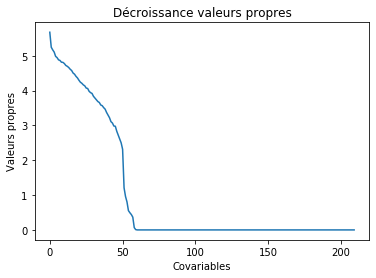

In [14]:
#Graphe de la décroissance des valeurs propres
plt.clf()
plt.figure()
plt.plot(sorted(eigenvalues[0],reverse=True))
plt.xlabel("Covariables")
plt.ylabel("Valeurs propres")
plt.title("Décroissance valeurs propres")
plt.show()

Il est légitime de ne garder que les 60 premières variables de l'ACP car on constate avec le graphe ci-dessus que les autres variables ont des valeurs propres nulles, c'est-à-dire qu'elles sont le résultat d'une combinaison linéaire de ces 60 variables.

----------------------
### Question 5 :
>Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS"
qui consiste à appliquer OLS avec $Y$ et $X_{train}V_{(1:60)}$, où $V_{(1:60)}$ contient les vecteurs propres (associés aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec intercept), puis tracer les valeurs des coefficients (hors intercept).
Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

<Figure size 432x288 with 0 Axes>

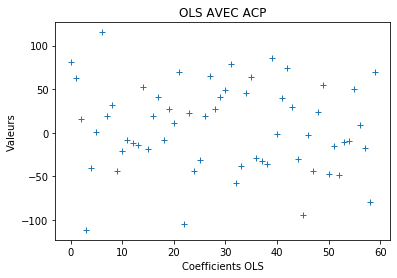

In [15]:
# PCA before OLS
# Nous n'utilisons plus les données centrées

plt.clf()
plt.figure()
X_acp = np.dot(X_train,np.transpose(eigenvectors[150:]))
lin_reg_acp = linear_model.LinearRegression()
lin_reg_acp.fit(X_acp , y_train)
plt.plot(lin_reg_acp.coef_,'+')
plt.xlabel("Coefficients OLS")
plt.ylabel("Valeurs")
plt.title("OLS AVEC ACP")
plt.show()

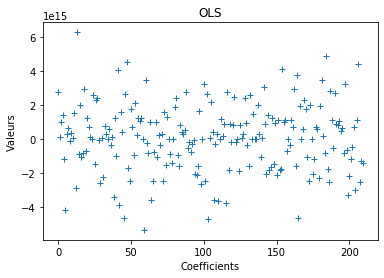

In [16]:
# OLS

plt.figure()
X_no_acp = X_train
lin_reg_no_acp = linear_model.LinearRegression()
lin_reg_no_acp.fit(X_no_acp, y_train)
plt.plot(lin_reg_no_acp.coef_,'+')
plt.xlabel("Coefficients")
plt.ylabel("Valeurs")
plt.title("OLS")
plt.show()

--------------
### Question 6 :

>Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur
moyenne de la variable $Y$ (sur le train set). Les intercepts des 2 questions sont-ils égaux ?
Commenter. Uniquement pour cette question, centrer et réduire les variables après ACP
(de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est
bien égal à la moyenne de Y sur le train.

In [17]:
# Affichage de l'intercept pour OLS avec ACP
print("L'intercept pour l'OLS avec ACP est de {:.4f}".format(lin_reg_acp.intercept_))

# Affichage de l'intercept pour OLS sans ACP
print("L'intercept pour l'OLS sans ACP est de {:.4f}".format(lin_reg_no_acp.intercept_))

# Affichage de la moyenne de la variable y_train
print("La moyenne de la variable Y sur le dataset d'entrainement est de {:.4f}".format(y_train.mean()))

L'intercept pour l'OLS avec ACP est de 151.6108
L'intercept pour l'OLS sans ACP est de 152.4491
La moyenne de la variable Y sur le dataset d'entrainement est de 152.9178


Les données utilisées n'étant pas normalisées, il est normal que notre intercept ne soit pas exactement égal à la moyenne de la variable à expliquer.

In [18]:
#Normaliser X_train
X_train_scaled = preprocessing.scale(X_train,with_mean='True', with_std='True')
X_acp_scaled = preprocessing.scale(X_acp,with_mean='True', with_std='True')

lin_reg1 = linear_model.LinearRegression()
lin_reg2 = linear_model.LinearRegression()
lin_reg1.fit(X_train_scaled , y_train)
lin_reg2.fit(X_acp_scaled , y_train)

#Intercept pour OLS avec avec ACP 
print("L'intercept pour l'OLS avec ACP et données normalisées est de {:.4f}".format(lin_reg2.intercept_))
print("La moyenne de la variable y à expliquer (set d'entrainement) est de {:.4f}".format(np.mean(y_train)))

L'intercept pour l'OLS avec ACP et données normalisées est de 152.9178
La moyenne de la variable y à expliquer (set d'entrainement) est de 152.9178


-------------------------
### Question 7 :
>Pour les 2 méthodes (OLS et PCA before OLS) : 
* Tracer les résidus de la prédiction sur l’échantillon test. 
* Tracer leur densité (on pourra par exemple utiliser un histogramme).
* Calculer le coefficient de détermination sur l’échantillon test. 
* Calculer le risque de prédiction sur l’échantillon test.



-----MODELE OLS SANS ACP-----

Le risque de prédiction est de 4395 
Le coefficient de détermination est de R2 = 0.2969



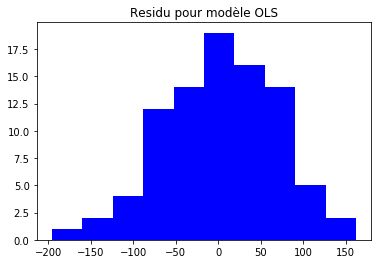

In [27]:
plt.figure()
X_no_acp = X_train
lin_reg_no_acp = linear_model.LinearRegression()
lin_reg_no_acp.fit(X_no_acp, y_train)
y_to_pred_no_acp = lin_reg_no_acp.predict(X_test)
residu_no_acp = y_to_pred_no_acp - y_test

plt.hist(residu_no_acp,color="b")
plt.title("Residu pour modèle OLS")
risque_prediction_no_acp=(np.linalg.norm(residu_no_acp))
R2_no_acp = r2_score(y_test,y_to_pred_no_acp)

risque_prediction_no_acp = mean_squared_error(y_test,y_to_pred_no_acp)

print("\n-----MODELE OLS SANS ACP-----\n")
print("Le risque de prédiction est de {:.0f} ".format(risque_prediction_no_acp))
print("Le coefficient de détermination est de R2 = {:.4f}\n".format(R2_no_acp))


-----MODELE OLS AVEC ACP-----

Le risque de prédiction est de 3002 
Le coefficient de détermination est de R2 = 0.5198



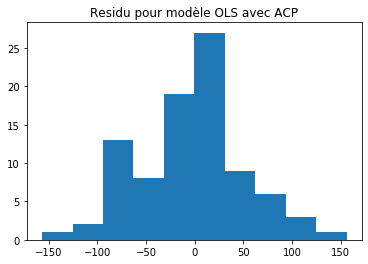

In [30]:
plt.figure()
X_test_acp = np.dot(X_test,np.transpose(eigenvectors[150:]))
y_to_pred_acp = lin_reg_acp.predict(X_test_acp)
residu_acp = y_to_pred_acp - y_test
risque_prediction_acp = (np.linalg.norm(residu_acp))

plt.hist(residu_acp)
plt.title("Residu pour modèle OLS avec ACP")
R2_acp = r2_score(y_test,y_to_pred_acp)
risque_prediction_acp = mean_squared_error(y_test,y_to_pred_acp)

print("\n-----MODELE OLS AVEC ACP-----\n")
print("Le risque de prédiction est de {:.0f} ".format(risque_prediction_acp))
print("Le coefficient de détermination est de R2 = {:.4f}\n".format(R2_acp))

-----------------
### Question 8 :